# Problem Statement

Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airline_df = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)

In [3]:
airline_df.head(10)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


In [4]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [5]:
airline_df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
airline_df["Date"]=pd.to_datetime(airline_df.index,format="%b-%y")
airline_df["Months"]=airline_df.Date.dt.strftime("%b")
airline_df["Year"]=airline_df.Date.dt.strftime("%Y")

In [7]:
airline_df.head()

,Passengers,Date,Months,Year
Month,,,,
1995-01-01,112,1995-01-01,Jan,1995
1995-02-01,118,1995-02-01,Feb,1995
1995-03-01,132,1995-03-01,Mar,1995
1995-04-01,129,1995-04-01,Apr,1995
1995-05-01,121,1995-05-01,May,1995


In [8]:
airline_df.isnull().sum()

Passengers    0
Date          0
Months        0
Year          0
dtype: int64

In [9]:
airline_df.dtypes

Passengers             int64
Date          datetime64[ns]
Months                object
Year                  object
dtype: object

<AxesSubplot:xlabel='Month', ylabel='Year'>

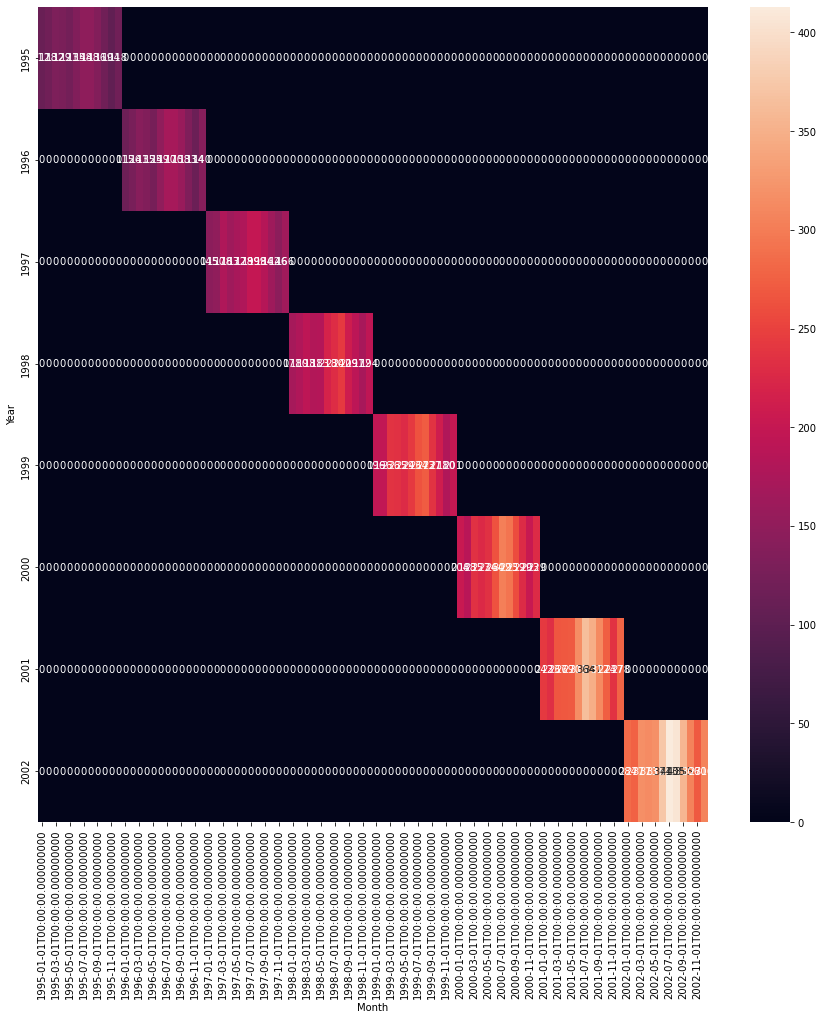

In [10]:
plt.figure(figsize=(15,15))
heatmap_y_month = pd.pivot_table(data=airline_df,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

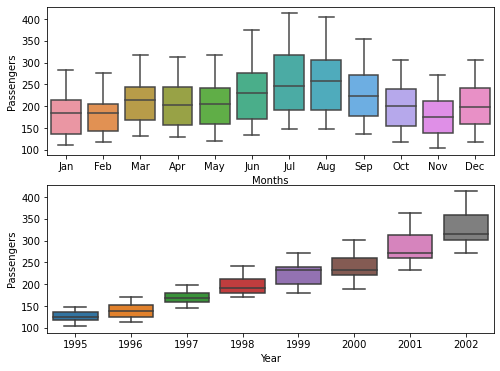

In [11]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Months',y='Passengers',data=airline_df)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers', data=airline_df)

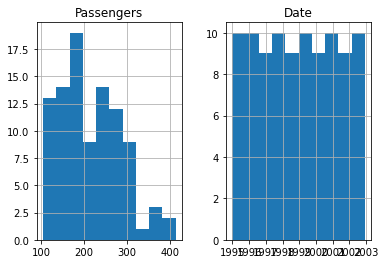

In [12]:
airline_df.hist()
plt.show()

<AxesSubplot:xlabel='Month'>

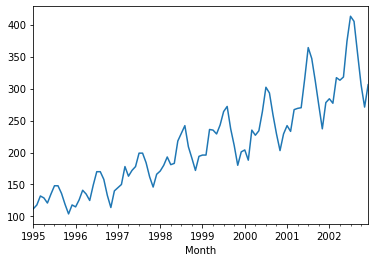

In [13]:
airline_df.Passengers.plot()

<AxesSubplot:ylabel='Density'>

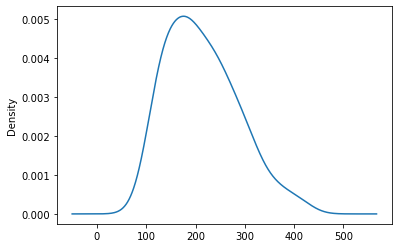

In [14]:
airline_df['Passengers'].plot(kind='kde')

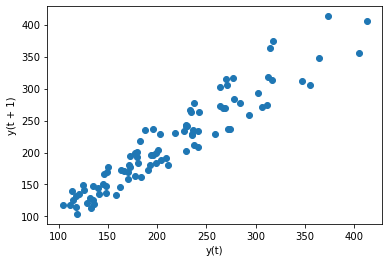

In [15]:
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(airline_df['Passengers'])
plt.show()

# Creating Dummy Variables

In [16]:
month_dummy = pd.DataFrame(pd.get_dummies(airline_df['Months']))
airline_df = pd.concat([airline_df,month_dummy],axis = 1)

In [17]:
airline_df.head(10)

,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Month,,,,,,,,,,,,,,,,
1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0
1995-07-01,148,1995-07-01,Jul,1995,0,0,0,0,0,1,0,0,0,0,0,0
1995-08-01,148,1995-08-01,Aug,1995,0,1,0,0,0,0,0,0,0,0,0,0
1995-09-01,136,1995-09-01,Sep,1995,0,0,0,0,0,0,0,0,0,0,0,1


# Splitting the Data

In [18]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Passengers  96 non-null     int64         
 1   Date        96 non-null     datetime64[ns]
 2   Months      96 non-null     object        
 3   Year        96 non-null     object        
 4   Apr         96 non-null     uint8         
 5   Aug         96 non-null     uint8         
 6   Dec         96 non-null     uint8         
 7   Feb         96 non-null     uint8         
 8   Jan         96 non-null     uint8         
 9   Jul         96 non-null     uint8         
 10  Jun         96 non-null     uint8         
 11  Mar         96 non-null     uint8         
 12  May         96 non-null     uint8         
 13  Nov         96 non-null     uint8         
 14  Oct         96 non-null     uint8         
 15  Sep         96 non-null     uint8         
dtypes: datet

In [19]:
airline_train = airline_df.head(80)
airline_test =airline_df.tail(16)

# Moving Average

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

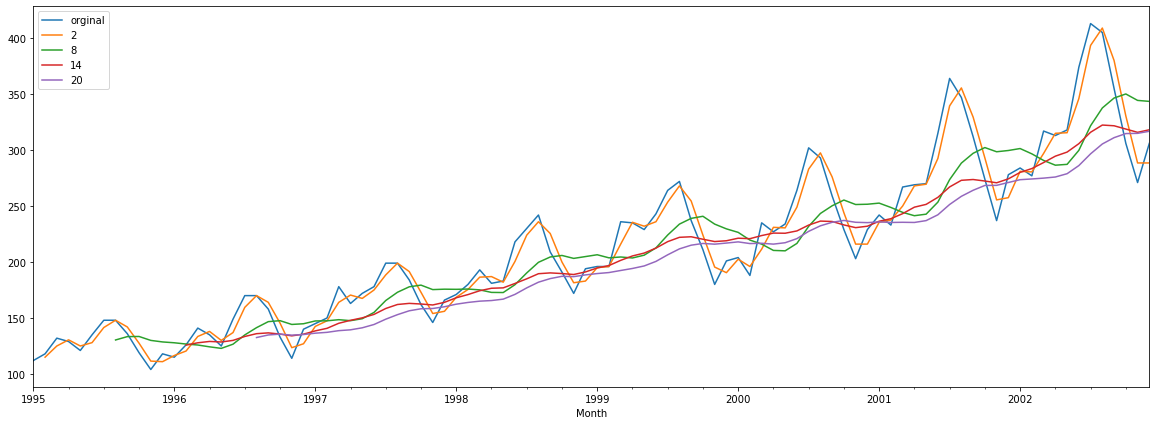

In [21]:
plt.figure(figsize=(20,7))
airline_df.Passengers.plot(label="orginal")
for i in range(2,24,6):
    airline_df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

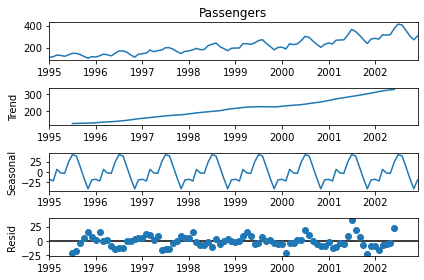

In [22]:
decompose_ts_add = seasonal_decompose(airline_df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots
A partial autocorrelation (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


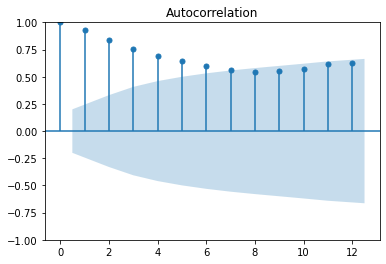

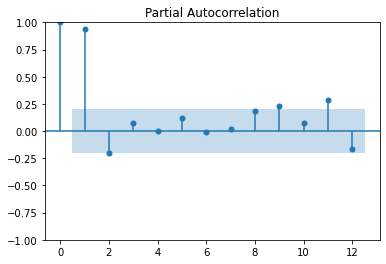

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline_df.Passengers,lags=12)
tsa_plots.plot_pacf(airline_df.Passengers,lags=12)
plt.show()

# Evaluation Metric MAPE and RMSE

In [24]:
import math

In [25]:
#Root Mean Square Error
def RMSE(pred,org):
    MSE = np.square(np.subtract(pred,org)).mean()  
    RMSE = math.sqrt(MSE)
    return RMSE

#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [26]:
ses_model = SimpleExpSmoothing(airline_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = airline_test.index[0],end = airline_test.index[-1])
MAPE(pred_ses,airline_test.Passengers) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


11.375850554268187

In [27]:
RMSE(pred_ses,airline_test.Passengers)

50.85821662656279

# Holt method 

In [28]:
# Holt method 
hw_model = Holt(airline_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = airline_test.index[0],end = airline_test.index[-1])
MAPE(pred_hw,airline_test.Passengers) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_17540\3651702449.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(airline_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


51.93443984363048

In [29]:
RMSE(pred_hw,airline_test.Passengers) 

169.36517518278364

# Holts winter exponential smoothing with additive seasonality and additive trend

In [30]:
hwe_model_add_add = ExponentialSmoothing(airline_train["Passengers"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = airline_test.index[0],end = airline_test.index[-1])
MAPE(pred_hwe_add_add,airline_test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


7.949424050264893

In [31]:
RMSE(pred_hwe_add_add,airline_test.Passengers)

26.09597638694431

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(airline_train["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = airline_test.index[0],end = airline_test.index[-1])
MAPE(pred_hwe_mul_add,airline_test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3.218004376708242

In [33]:
RMSE(pred_hwe_mul_add,airline_test.Passengers)

14.571832124417902

**RMSE(Root Mean Square Error) and MAPE(Mean Absolute Percentage Error) is lowest for  multiplicative seasonality and additive trend.So, we choose Holts winter exponential smoothing
method.**

# Final Model by combining train and test

In [34]:
hwe_model_mul_add = ExponentialSmoothing(airline_df["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
pass_predicted=hwe_model_mul_add.forecast(10)
pass_predicted

2003-01-01    312.900533
2003-02-01    308.172851
2003-03-01    355.534843
2003-04-01    345.772161
2003-05-01    345.698761
2003-06-01    392.473944
2003-07-01    436.505077
2003-08-01    429.863114
2003-09-01    380.176787
2003-10-01    332.321235
Freq: MS, dtype: float64

# Forecasting using SARIMA Model(Seasonal ARIMA) 

In [36]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [37]:
test_result=adfuller(airline_df['Passengers'])

In [38]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(passanger):
    result=adfuller(passanger)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [39]:
adfuller_test(airline_df['Passengers'])

ADF Test Statistic : 1.3402479596467032
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

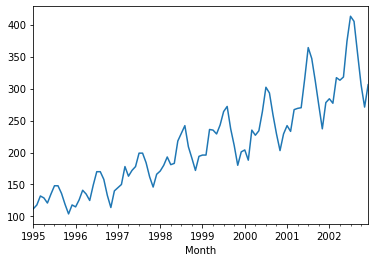

In [40]:
airline_df['Passengers'].plot()

# So,given time series is not sationary and also seasonal.We can see similar pattern is reapeating every year(12 months)

In [41]:
airline_df['Seasonal First Difference']=airline_df['Passengers']-airline_df['Passengers'].shift(12)

In [42]:
airline_df

,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Seasonal First Difference
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,NaN
1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,NaN
1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,NaN
1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,NaN
1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,58.0
2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,43.0
2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,32.0


In [43]:
## Again test dickey fuller test
adfuller_test(airline_df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.6900043838623167
p-value : 0.07578397625851754
#Lags Used : 1
Number of Observations Used : 82
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

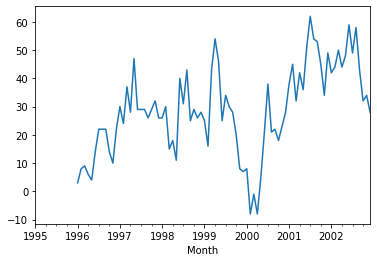

In [44]:
airline_df['Seasonal First Difference'].plot()

In [45]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


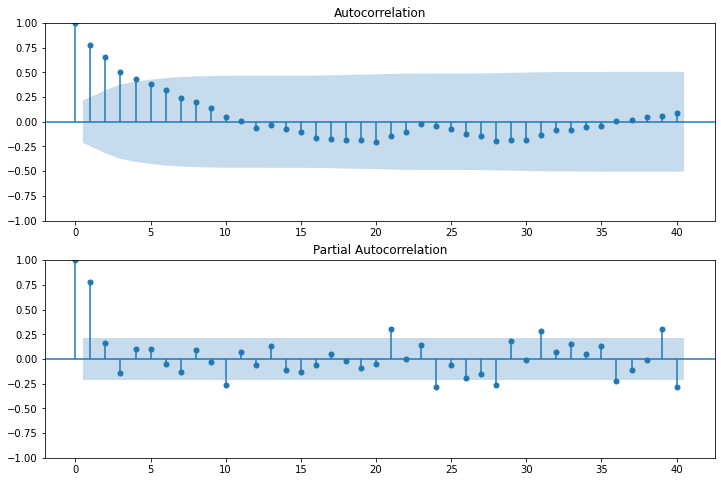

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(airline_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(airline_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [47]:
model=sm.tsa.statespace.SARIMAX(airline_df['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

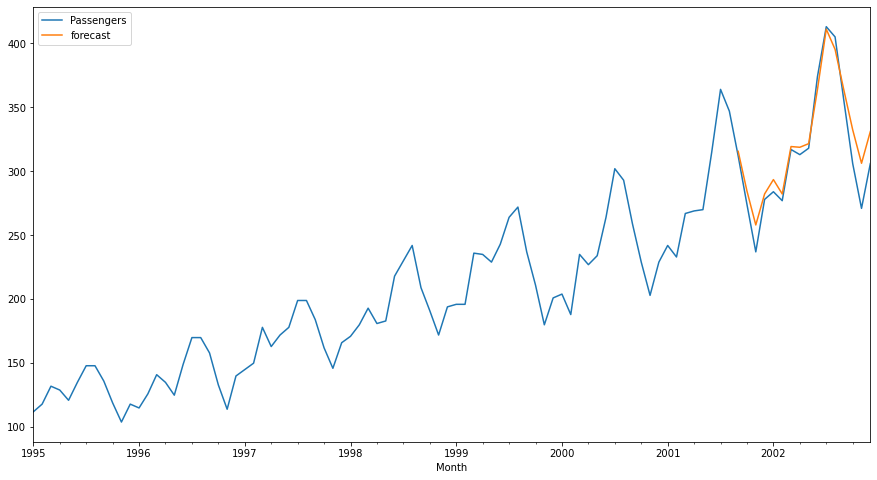

In [48]:
airline_df['forecast']=results.predict(start=80,end=103,dynamic=True)
airline_df[['Passengers','forecast']].plot(figsize=(15,8))

In [49]:
#So forecasted values are closer to actual value

In [50]:
from pandas.tseries.offsets import DateOffset
future_dates=[airline_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [51]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=airline_df.columns)

In [52]:
future_datest_df.tail()

,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Seasonal First Difference,forecast
2004-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
future_df=pd.concat([airline_df,future_datest_df])

In [54]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Passengers                 96 non-null     int64         
 1   Date                       96 non-null     datetime64[ns]
 2   Months                     96 non-null     object        
 3   Year                       96 non-null     object        
 4   Apr                        96 non-null     uint8         
 5   Aug                        96 non-null     uint8         
 6   Dec                        96 non-null     uint8         
 7   Feb                        96 non-null     uint8         
 8   Jan                        96 non-null     uint8         
 9   Jul                        96 non-null     uint8         
 10  Jun                        96 non-null     uint8         
 11  Mar                        96 non-null     uint8     

<AxesSubplot:>

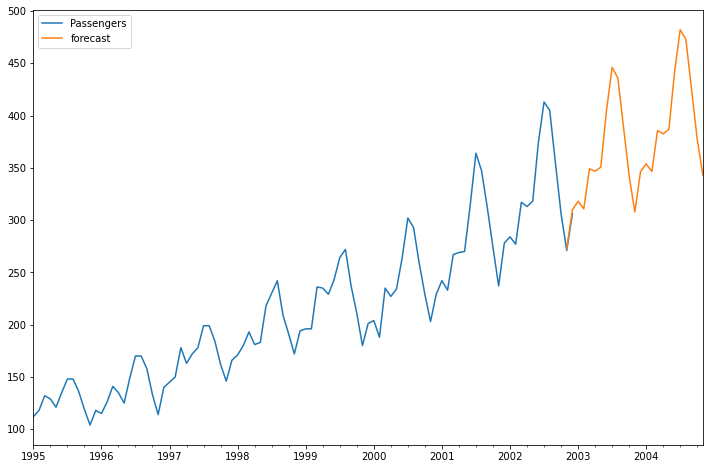

In [55]:
future_df['forecast'] = results.predict(start = 94, end = 120, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))

In [56]:
future_df['forecast'].tail(23)

2003-01-01    318.087376
2003-02-01    310.758275
2003-03-01    349.113037
2003-04-01    346.737163
2003-05-01    350.629438
2003-06-01    404.592044
2003-07-01    446.092696
2003-08-01    435.922559
2003-09-01    389.180198
2003-10-01    342.333518
2003-11-01    307.704568
2003-12-01    346.320122
2004-01-01    353.750692
2004-02-01    346.512896
2004-03-01    385.500465
2004-04-01    382.507187
2004-05-01    386.819664
2004-06-01    441.538165
2004-07-01    482.108434
2004-08-01    472.746378
2004-09-01    424.789615
2004-10-01    377.139037
2004-11-01    342.951923
Name: forecast, dtype: float64

<AxesSubplot:>

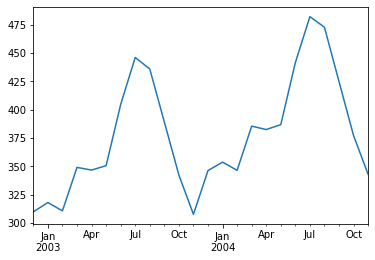

In [57]:
future_df['forecast'].tail(24).plot()

***So,using SARIMA model we get simliar pattern for forecasted values*** 